#  <span style="color:blue"> Multiple Linear regression</span>

## <span style="color:red">Licence Professionnelle en Big Data et Intelligence Artificielle </span>

### <span style="color:purple">Réalisée par:</span> EZ-ZARZOURI Houda

## <span style="color:red">Objectifs :</span>
Dans cet exercice, je vais mettre en œuvre la régression linéaire multiple en utilisant les modules scikit-learn et voir comment cela fonctionne sur des données réelles.
J'effectuera les étapes suivantes pour mettre en œuvre et tester votre modèle :
+ Importez les bibliothèques et les données, en identifiant les variables dépendantes et indépendantes.
+ Divisez l'ensemble de données en ensemble d'entraînement et ensemble de test.
+ Entraînez le modèle sur l'ensemble d'entraînement.
+ Évaluez les performances du modèle.

### <span style="color:red"> Implementation of Multiple Linear regression</span>

### <span style="color:red">1. Import the librairies and the data</span>

In [40]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import seaborn as sns

#### De plus, dans cet exercice, je vais utiliser un ensemble de données réel pour prédire le prix des maisons, House Sales in King County, USA, téléchargé depuis Kaggle.

In [41]:
data = pd.read_csv('C:\kc_house_data.csv')

In [42]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Lorsque nous travaillons avec un ensemble de données brut, nous devons traiter les valeurs nulles et supprimer les colonnes qui semblent insignifiantes pour atteindre l'objectif. Notre ensemble de données ne contenait pas de valeurs nulles et les colonnes id, date, lat et long doivent être supprimées.

#### Sélectionner la variable dépendante (le prix) dans un vecteur y et les variables indépendantes (toutes les autres caractéristiques sauf id, date, lat, long) dans une matrice x.

In [43]:

X=data.drop(['id','date','lat','long'],axis=1)

In [44]:
X

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


In [45]:
y=data['price'].values

In [46]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

#### Voir la dimension de X et y.

In [47]:
X.shape


(21613, 17)

In [48]:
y.shape

(21613,)

In [49]:
#Redimensionner y
y=y.reshape(-1,1)

In [50]:
y.shape

(21613, 1)

### <span style="color:red">2. Split the dataset into the Training set and Test set</span>

Nous devons diviser un ensemble de données en ensembles d'apprentissage et de test pour évaluer les performances de notre modèle d'apprentissage automatique. L'ensemble d'apprentissage est utilisé pour ajuster le modèle, et les statistiques de l'ensemble d'apprentissage sont connues. Le deuxième ensemble est appelé ensemble de données de test, cet ensemble est uniquement utilisé pour les prédictions.
+ La méthode train_test_split() est utilisée pour diviser nos données en ensembles d'apprentissage et de test. Tout d'abord, nous devons diviser nos données en caractéristiques (X) et étiquettes (y). Le dataframe est divisé en X_train, X_test, y_train et y_test. Les ensembles X_train et y_train sont utilisés pour entraîner et ajuster le modèle.
+ Je vais donner en paramètre à la méthode train_test_split() : X, y, test_size=<donnez une valeur pour le pourcentage de séparation>, random_state=<donnez un entier, par exemple 1>.

In [51]:
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train , y_test=train_test_split(X, y,test_size=0.2, random_state=20)

In [52]:
# Afficher la dimension des ensembles d'apprentissage et de test
print("Dimensions de X_train:", X_train.shape)
print("Dimensions de y_train:", y_train.shape)
print("Dimensions de X_test:", X_test.shape)
print("Dimensions de y_test:", y_test.shape)

Dimensions de X_train: (17290, 17)
Dimensions de y_train: (17290, 1)
Dimensions de X_test: (4323, 17)
Dimensions de y_test: (4323, 1)


### <span style="color:red">3. Train the model on the Training set </span>

Je vais d'abord définir et initialiser le modèle d'apprentissage automatique qui sera utilisé.
+ LinearRegression ajuste un modèle linéaire avec des coefficients w = (w1, …, wp) pour minimiser la somme des carrés résiduels entre les cibles observées dans l'ensemble de données et les cibles prédites par l'approximation linéaire.

In [53]:
regressor = LinearRegression()

+ Entraîner un modèle avec scikit-learn et en utilisant la méthode fit() de l'objet regressor

In [54]:
regressor.fit(X_train,y_train)

LinearRegression()

### <span style="color:red">4. Assess the model performance</span>

+ Pour effectuer des prédictions, je vais utiliser la fonction predict() sur l'ensemble de test X_test. Cette fonction prédit les valeurs en se basant sur les comportements des données précédentes et en les ajustant au modèle.

In [55]:
pred=regressor.predict(X_test)

In [56]:
pred

array([[ 550000.],
       [ 202000.],
       [ 775900.],
       ...,
       [1100000.],
       [ 325000.],
       [ 346150.]])

+ Calculer le score R² en utilisant la fonction score(). 

In [57]:
r_squared=regressor.score(X_train,y_train)
r_squared

1.0

+ calculer le MSE.

In [58]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,pred)
MSE

7.358836302125897e-20

+ calculer le RMSE

In [59]:
RMSE=np.sqrt(MSE)
RMSE

2.7127175124081566e-10

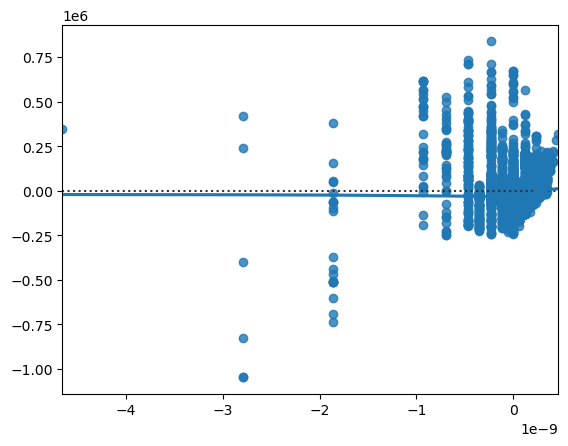

In [60]:
import seaborn as sns
error=y_test-pred
sns.residplot(x=error,y=pred,lowess=True)
plt.show()

 L'évaluation de la performance du modèle à l'aide de ces différentes mesures peut aider à comprendre à quel point le modèle est précis et fiable. 
+ Plus le score R² est proche de 1, plus le modèle est capable de prédire les valeurs correctes et on a r_squared=1 Donc le modèle est capable de prédire les valeurs correctes.
+ De même, plus le MSE et le RMSE sont faibles, plus les prédictions du modèle sont précises.
+ Le résidu plot est un outil visuel qui peut aider à détecter des problèmes avec le modèle. Si les résidus ont une forme aléatoire autour de zéro et que leur variance est constante, cela suggère que le modèle fonctionne bien. Cependant, si les résidus ont une tendance ou une forme spécifique, cela peut indiquer que le modèle ne capture pas correctement certains aspects des données. Il est important d'analyser le résidu plot pour vérifier que le modèle est approprié pour les données.
Et dans notre modèle le résidu plot les résidus ont une forme aléatoire autour de zéro et que leur variance est constante alors notre modèle fonctionne bien.